In [128]:
import copy

import pandas as pd
import numpy as np
import os

In [129]:
# 添加验证集和测试集
train_df = pd.read_csv('../UJIIndoorLoc/trainingData.csv')
train_df_noisy = pd.read_csv('../data/train_noisy.csv')
train_df_noisy1 = pd.read_csv('../data/train_noisy1.csv')
train_df_noisy2 = pd.read_csv('../data/train_noisy2.csv')
# train_df_noisy3 = pd.read_csv('../data/train_noisy3.csv')
train_df_noisy4 = pd.read_csv('../data/train_noisy4.csv')
train_df_noisy5 = pd.read_csv('../data/train_noisy5.csv')

# train_df = pd.concat([train_df, train_df_noisy4], ignore_index=True)
train_df = pd.concat([train_df, train_df_noisy1], ignore_index=True)
# train_df = pd.concat([train_df, train_df_noisy2], ignore_index=True)
# train_df = pd.concat([train_df, train_df_noisy5], ignore_index=True)
valid_df = pd.read_csv('../UJIIndoorLoc/validationData.csv')

total_df = pd.concat([train_df, valid_df])

In [130]:
# 训练集特征
training_data = train_df[train_df.columns[:520]].to_numpy()
# training_data[training_data == 100] = -110
training_floors = train_df['FLOOR'].to_numpy() # FLOOR LABELS
training_buildings = train_df['BUILDINGID'].to_numpy() # BUILDING LABELS
training_longitude = train_df['LONGITUDE'].to_numpy() # LONGITUDE LABELS
training_latitude = train_df['LATITUDE'].to_numpy() # LATITUDE LABELS
training_coords = train_df[['LONGITUDE','LATITUDE']].to_numpy() # LONGITUDE + LATITUDE LABELS
print(training_coords[0])

[  -7541.2643 4864920.7782]


In [131]:
# 验证机特征
valid_data = valid_df[valid_df.columns[:520]].to_numpy()
# valid_data[valid_data == 100] = -110
valid_floors = valid_df['FLOOR'].to_numpy() # FLOOR LABELS
valid_buildings = valid_df['BUILDINGID'].to_numpy() # BUILDING LABELS
valid_longitude = valid_df['LONGITUDE'].to_numpy() # LONGITUDE LABELS
valid_latitude = valid_df['LATITUDE'].to_numpy() # LATITUDE LABELS
valid_coords = valid_df[['LONGITUDE','LATITUDE']].to_numpy() # LONGITUDE + LATITUDE LABELS

In [132]:
totaling_data = total_df[total_df.columns[:520]].to_numpy()
# totaling_data[totaling_data == 100] = -110
totaling_floors = total_df['FLOOR'].to_numpy() # FLOOR LABELS
totaling_buildings = total_df['BUILDINGID'].to_numpy() # BUILDING LABELS
totaling_longitude = total_df['LONGITUDE'].to_numpy() # LONGITUDE LABELS
totaling_latitude = total_df['LATITUDE'].to_numpy() # LATITUDE LABELS
totaling_coords = total_df[['LONGITUDE','LATITUDE']].to_numpy() # LONGITUDE + LATITUDE LABELS

In [133]:
# from sklearn.preprocessing import StandardScaler
# from Algorithms.utill.ELM import ELM_AE
# # 2. 标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(training_data)
# 
# # 3. ELM降维
# elm_ae = ELM_AE(input_dim=training_data.shape[1], hidden_dim=256)
# training_data = elm_ae.fit_transform(X_scaled)
# 
# print(training_data[0])
# print(totaling_coords[0])

[3.34426332e-14 9.99999415e-01 1.14995577e-17 9.97922905e-01
 2.45364407e-11 1.57066709e-05 9.28017277e-04 9.99999953e-01
 9.99953858e-01 1.42776964e-18 3.73071521e-01 3.34901730e-19
 7.53661678e-10 7.09015191e-11 1.00000000e+00 1.00000000e+00
 2.77400215e-04 7.99060029e-05 1.04254105e-08 9.99999630e-01
 9.99999995e-01 9.99878267e-01 4.47589065e-02 9.99999996e-01
 1.64043132e-06 7.45948968e-01 1.00000000e+00 5.74582001e-06
 4.63477275e-09 9.79482431e-01 9.89415328e-01 9.99796095e-01
 9.99562169e-01 1.00000000e+00 9.98710415e-01 1.00000000e+00
 3.46859544e-02 1.64771671e-05 1.03801831e-12 1.15766970e-10
 1.00000000e+00 6.43116904e-11 3.49971123e-02 9.99648100e-01
 9.99999684e-01 4.49440916e-01 1.00000000e+00 9.99980044e-01
 3.76648858e-06 1.00000000e+00 2.86885270e-01 9.99901602e-01
 9.99997608e-01 9.99998533e-01 2.10422434e-22 9.97630138e-01
 7.32608971e-01 9.43091234e-01 6.78797662e-02 1.67431903e-17
 8.29781223e-01 1.00000000e+00 1.00000000e+00 7.74595276e-01
 6.20021768e-12 9.449948

In [117]:
from utill.data_standar import normalize_rssi, normalize_coords, normalize_test_or_valid_data
# 数据标准化,从总数居获取最大值最小值
X_totalCo_cnn, X_min, X_max = normalize_rssi(totaling_data)
print(X_min, X_max)
# 训练集特征标准化
training_data = normalize_test_or_valid_data(X_min, X_max, training_data)
# 验证集特征标准化
valid_data = normalize_test_or_valid_data(X_min, X_max, valid_data)
# 训练集标签标准化
print(training_coords[0])
training_coords, y_min, y_max = normalize_coords(totaling_coords, training_coords)
# 验证集标签标准化
valid_coords, y_va_min, y_va_max = normalize_coords(totaling_coords, valid_coords)
# 保存的最大，最小值
print(y_min, y_max)
min_max_dist = [y_min, y_max, y_min, y_max]

-105.41166034560202 100.0
[  -7541.2643 4864920.7782]
[  -7695.93875493 4864745.74501597] [  -7299.78651673 4865017.3646842 ]


In [118]:
print(training_data.shape)

(59811, 520)


In [119]:
# Augmenting data shape to fit 23x23
training_data_aug = np.empty((len(training_data),529))
for x in range(len(training_data)):
    training_data_aug[x] = np.concatenate((training_data[x], np.full(shape=9,fill_value=1)))
# Augmenting data shape to fit 23*23
valid_data_aug = np.empty((len(valid_data),529))
for x in range(len(valid_data)):
    valid_data_aug[x] = np.concatenate((valid_data[x], np.full(shape=9,fill_value=1)))
# valid_data_aug.shape
# training_data_aug = training_data

In [120]:
from sklearn.model_selection import train_test_split
X_trainCo_cnn, X_testCo_cnn, y_trainCo_cnn, y_testCo_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_coords, test_size=0.2, random_state=2812)
# X_trainCo_cnn, y_trainCo_cnn = training_data_aug.reshape(len(training_data_aug),23,23), training_coords
X_valid_Co_cnn, y_validCo_cnn = valid_data_aug.reshape(len(valid_data_aug),23,23), valid_coords

In [121]:
print(X_trainCo_cnn[:5])
print(X_testCo_cnn[:5])
print(y_trainCo_cnn[:5])
print(y_testCo_cnn[:5])


[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         0.24026916 ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.      

In [122]:
# from utill.data_standar import normalize_rssi, normalize_coords
# 
# X_trainCo_cnn, X_trainCo_rssi_min, X_trainCo_rssi_max = normalize_rssi(X_trainCo_cnn)
# X_testCo_cnn, X_testCo_rssi_min, X_testCo_rssi_max = normalize_rssi(X_testCo_cnn)
# y_trainCo_cnn, y_trainCo_rssi_min, y_trainCo_rssi_max = normalize_coords(y_trainCo_cnn)
# y_testCo_cnn, y_testCo_rssi_min, y_testCo_rssi_max = normalize_coords(y_testCo_cnn)
# min_max_dist = [y_trainCo_rssi_min, y_trainCo_rssi_max, y_testCo_rssi_min, y_testCo_rssi_max]

In [123]:
print(y_trainCo_cnn[:5])
print(y_testCo_cnn[:5])

[[0.46552117 0.39686075]
 [0.15769027 0.80845907]
 [0.88871857 0.        ]
 [0.27473391 0.88486223]
 [0.14192361 0.96243172]]
[[0.137234   0.96866323]
 [0.44662137 0.74997435]
 [0.96937318 0.23274745]
 [0.90163685 0.29494213]
 [0.6766852  0.5559317 ]]


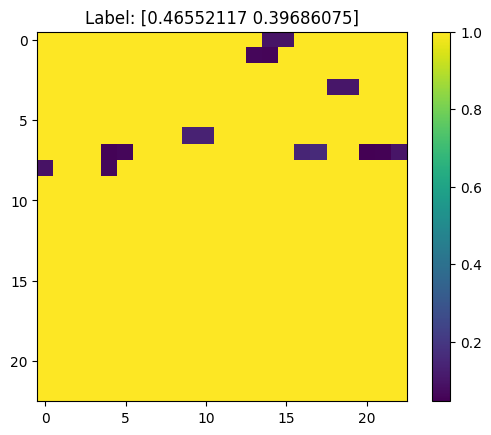

In [124]:
import matplotlib.pyplot as plt
single_image = X_trainCo_cnn[0]
plt.imshow(single_image)
plt.title(f'Label: {y_trainCo_cnn[0]}')
plt.colorbar()
plt.show()

In [125]:
from CNN import CNNRegressor
from utill.data_standar import denormalize_coords, mean_euclidean_distance

In [126]:
# Longitude+Latitude Regressor
dropout = [0.2]
val_kernel = [7]
val_padding = [3]
for val in dropout:
    for i in range(1):
        print(f'(Dropout: {val}) (kernel: {val_kernel[i]}) (padding: {val_padding[i]}) (lr: 0.001) (batch_size=100)')
        cnn = CNNRegressor(n_targets=2, dropout=val, kernel_size=val_kernel[i], padding=val_padding[i]) # Longitude + Latitude are targets
        cnn.fit(X_trainCo_cnn, y_trainCo_cnn, X_testCo_cnn, y_testCo_cnn)
        # cnn.fit(X_trainCo_cnn, y_trainCo_cnn_scaled, X_testCo_cnn, y_testCo_cnn_scaled)
        # cnn.train(num_epochs=100,eval_train=True, min_max_dist=min_max_dist, lr=0.0001, batch_size=16)
        cnn.train_model(num_epochs=300,eval_train=True, min_max_dist=min_max_dist, lr=0.0001, batch_size=64, patience = 7)


(Dropout: 0.2) (kernel: 7) (padding: 3) (lr: 0.001) (batch_size=100)
Epoch [1/300], Step [748/748], Loss: 0.0075
48.579924319897486
48.481945234489686
→ Model improved. Saving...
------------------------------
Epoch [2/300], Step [748/748], Loss: 0.0013
14.715303510268063
14.86824965816309
→ Model improved. Saving...
------------------------------
Epoch [3/300], Step [748/748], Loss: 0.0010
12.485106876702451
12.684656989834465
→ Model improved. Saving...
------------------------------
Epoch [4/300], Step [748/748], Loss: 0.0009
11.192641303389797
11.39438316958207
→ Model improved. Saving...
------------------------------
Epoch [5/300], Step [748/748], Loss: 0.0008
10.082341182276366
10.347546440886406
→ Model improved. Saving...
------------------------------
Epoch [6/300], Step [748/748], Loss: 0.0008
9.555953488171001
9.859320049014089
→ Model improved. Saving...
------------------------------
Epoch [7/300], Step [748/748], Loss: 0.0007
9.00265743486409
9.345953252300175
→ Model im

In [127]:
from CNN import CNNRegressor
import numpy as np
# 假设你的模型是 CNNRegressor，有两个目标值
model = CNNRegressor(n_targets=2, kernel_size=7, stride=1, padding=3, dropout=0.2)
 
# 加载保存的权重
model.load_model('best_model.pth')
model.X_train = np.zeros_like(X_valid_Co_cnn)  # 随便补一个假的训练集占位，不会用到
model.Y_train = np.zeros_like(y_validCo_cnn)
# 注意：还需要加载相应的数据
model.X_test = X_valid_Co_cnn
model.Y_test = y_validCo_cnn
# model.X_train = None
# model.y_train = None
model.create_loaders(batch_size=64)


predictions, targets = model.test(model.loaders['test'])

# 若你是多目标回归任务（例如RSSI定位），建议继续后处理：
preds_denorm = denormalize_coords(predictions, min_max_dist[2], min_max_dist[3])
targets_denorm = denormalize_coords(targets, min_max_dist[2], min_max_dist[3])

average_dist = mean_euclidean_distance(preds_denorm, targets_denorm)
print(f"Test set average Euclidean distance: {average_dist:.2f} meters")


Test set average Euclidean distance: 20.28 meters
